Bacha: nemělo by se to, ale df v druhé půlce je jiný dataframe než v první, takže spouštět nejlépe jenom celé.

In [162]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [163]:
def obdobi(radek):
    return f"""{radek['odjezd'].dayofweek + 1}-{radek['odjezd'].hour // 4}"""

## I. Do 4 hodin do odjezdu

In [165]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]
nejdelsi = df['jizdni_doba'].quantile(0.95)
print(f"Nejdelší započítané spojení: {int(nejdelsi)} minut.")
df = df[df['jizdni_doba'] <= nejdelsi]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)
df[df['oscrapovano'] <= '2024-11-26']

Nejdelší započítané spojení: 255 minut.


,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi
143545,2024-11-08 08:03:15,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 08:19:00,0 days 00:15:45,0,0.262500,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[],None,pá,0,[EC 141 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 08:19,5-2
144832,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 18:19:00,0 days 09:25:19,0,9.421944,609.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,216.0,356.0,[0],None,pá,0,[IC 547 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 18:19,5-4
144833,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-09 07:19:00,0 days 22:25:19,0,22.421944,569.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,224.0,356.0,"[0, 0]",None,so,1,"[EC 123 Valašský expres, EC 106 Porta Moravica]",True,None,NaN,NaN,NaN,NaN,ČD so 07:19,6-1
144834,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-09 05:19:00,0 days 20:25:19,0,20.421944,569.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,224.0,356.0,"[0, 0]",None,so,1,"[EC 121 Valašský expres, EC 108 Sobieski]",True,None,NaN,NaN,NaN,NaN,ČD so 05:19,6-1
144835,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 20:19:00,0 days 11:25:19,0,11.421944,569.0,vlak,NaN,[Předpokládané nízké obsazení],209.0,356.0,[0],None,pá,0,[IC 549 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 20:19,5-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847812,2024-11-25 23:27:17,LE,Ostrava-Svinov,Praha hl.n.,2025-02-05 07:05:00,71 days 07:37:43,71,1711.628611,209.0,None,67.0,None,202.0,351.0,None,None,st,0,[LE412],None,None,21.0,21.0,19.0,6.0,LE st 07:05,3-1
847813,2024-11-25 23:27:17,LE,Ostrava hl.n.,Praha hl.n.,2025-02-05 06:58:00,71 days 07:30:43,71,1711.511944,209.0,None,67.0,None,209.0,356.0,None,None,st,0,[LE412],None,None,21.0,21.0,19.0,6.0,LE st 06:58,3-1
847814,2024-11-25 23:27:17,LE,Ostrava hl.n.,Praha hl.n.,2025-02-05 04:58:00,71 days 05:30:43,71,1709.511944,209.0,None,67.0,None,209.0,356.0,None,None,st,0,[LE1250],None,None,21.0,21.0,19.0,6.0,LE st 04:58,3-1
847815,2024-11-25 23:27:17,LE,Ostrava-Svinov,Praha hl.n.,2025-02-05 17:13:00,71 days 17:45:43,71,1721.761944,99.0,None,67.0,None,194.0,351.0,None,None,st,0,[LE1262],None,None,21.0,21.0,19.0,6.0,LE st 17:13,3-4


In [166]:
df = df[df['predstih_h'] <= 4]
df = df[df['predstih_h'] >= 0]

In [167]:
prgova = df[df['odkud'].str.contains('Pra') & df['kam'].str.contains('Ostra')]

In [168]:
ovaprg = df[df['odkud'].str.contains('Ostra') & df['kam'].str.contains('Pra')]

<Axes: xlabel='obdobi'>

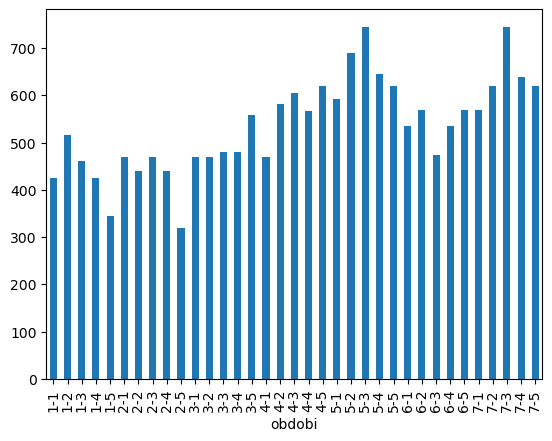

In [169]:
prgova.groupby('obdobi')['cena'].median().plot.bar()

<Axes: xlabel='obdobi'>

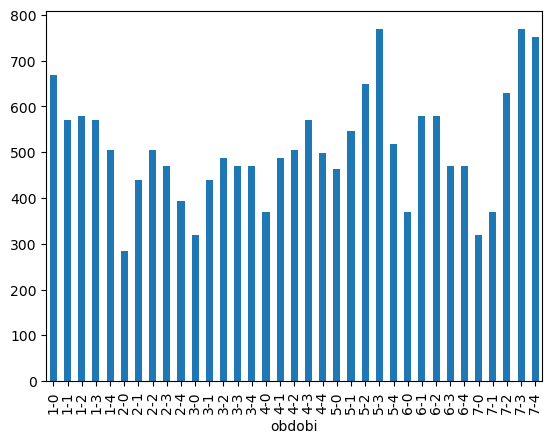

In [170]:
ovaprg.groupby('obdobi')['cena'].median().plot.bar()

In [171]:
df[df['odkud'].str.contains('Pra')].groupby('obdobi')['volnych_mist'].median().nsmallest(10)

obdobi
7-3     4.0
5-3    17.0
5-2    20.0
7-4    20.0
5-4    23.0
4-3    23.5
6-1    25.0
3-3    31.0
7-5    32.0
4-5    32.5
Name: volnych_mist, dtype: float64

In [172]:
df[df['odkud'].str.contains('Ostra')].groupby('obdobi')['volnych_mist'].median().nsmallest(10)

obdobi
7-3    12.0
5-1    14.5
7-4    15.0
5-3    18.0
5-2    19.0
3-2    29.0
4-2    29.0
4-3    29.5
7-2    30.0
1-0    31.0
Name: volnych_mist, dtype: float64

In [173]:
df[df['odkud'].str.contains('Pra')].groupby('obdobi')['cena'].median().nlargest(10)

obdobi
5-3    744.0
7-3    744.0
5-2    689.0
5-4    644.0
7-4    639.0
4-5    619.0
5-5    619.0
7-2    619.0
7-5    619.0
4-3    604.0
Name: cena, dtype: float64

In [174]:
df[df['odkud'].str.contains('Ostra')].groupby('obdobi')['cena'].median().nlargest(10)

obdobi
5-3    769.0
7-3    769.0
7-4    751.5
1-0    669.0
5-2    649.0
7-2    629.0
1-2    579.0
6-1    579.0
6-2    579.0
1-1    570.0
Name: cena, dtype: float64

In [175]:
df[df['odkud'].str.contains('Ostra')].groupby('obdobi')['cena'].median().nsmallest(10)

obdobi
2-0    284.0
3-0    319.0
7-0    319.0
4-0    369.0
6-0    369.0
7-1    369.0
2-4    394.0
2-1    439.0
3-1    439.0
5-0    464.0
Name: cena, dtype: float64

In [176]:
df.groupby('obdobi')['cena'].median().nlargest(10)

obdobi
5-3    769.0
7-3    759.0
5-2    689.0
1-0    669.0
7-4    654.0
4-5    619.0
5-4    619.0
5-5    619.0
7-2    619.0
7-5    619.0
Name: cena, dtype: float64

In [177]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(20)

obdobi
7-3     2.00
5-3     6.50
5-2     7.51
5-1    10.55
7-4    11.00
4-3    20.87
5-4    21.98
7-2    27.08
3-2    30.00
3-3    30.00
4-2    30.00
7-5    30.00
1-0    30.32
4-5    31.00
6-2    31.00
5-5    31.83
3-5    33.00
6-1    33.63
1-2    33.76
2-0    34.81
Name: volnych_mist, dtype: float64

In [178]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(10)

obdobi
7-3     2.00
5-3     6.50
5-2     7.51
5-1    10.55
7-4    11.00
4-3    20.87
5-4    21.98
7-2    27.08
3-2    30.00
3-3    30.00
Name: volnych_mist, dtype: float64

In [179]:
df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nlargest(10)

obdobi
2-1    116.20
1-1     99.44
3-4     55.88
6-4     54.60
2-4     54.50
3-1     51.47
3-0     49.92
1-4     49.00
1-5     49.00
4-1     46.65
Name: volnych_mist, dtype: float64

In [180]:
spicka = df[df['prodejce'].isin(['RJ','LE'])].groupby('obdobi')['volnych_mist'].quantile(0.33).nsmallest(4).index.to_list()

## II. Kdykoliv

In [182]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))
df = df[df['odkud'].str.contains('Ostrava') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Ostrava') | df['kam'].str.contains('Praha')]
nejdelsi = df['jizdni_doba'].quantile(0.95)
print(f"Nejdelší započítané spojení: {int(nejdelsi)} minut.")
df = df[df['jizdni_doba'] <= nejdelsi]
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)
df[df['oscrapovano'] <= '2024-11-26']

Nejdelší započítané spojení: 255 minut.


,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi
143545,2024-11-08 08:03:15,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 08:19:00,0 days 00:15:45,0,0.262500,619.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,209.0,356.0,[],None,pá,0,[EC 141 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 08:19,5-2
144832,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 18:19:00,0 days 09:25:19,0,9.421944,609.0,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,216.0,356.0,[0],None,pá,0,[IC 547 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 18:19,5-4
144833,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-09 07:19:00,0 days 22:25:19,0,22.421944,569.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,224.0,356.0,"[0, 0]",None,so,1,"[EC 123 Valašský expres, EC 106 Porta Moravica]",True,None,NaN,NaN,NaN,NaN,ČD so 07:19,6-1
144834,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-09 05:19:00,0 days 20:25:19,0,20.421944,569.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,224.0,356.0,"[0, 0]",None,so,1,"[EC 121 Valašský expres, EC 108 Sobieski]",True,None,NaN,NaN,NaN,NaN,ČD so 05:19,6-1
144835,2024-11-08 08:53:41,ČD,Praha hl.n.,Ostrava hl.n.,2024-11-08 20:19:00,0 days 11:25:19,0,11.421944,569.0,vlak,NaN,[Předpokládané nízké obsazení],209.0,356.0,[0],None,pá,0,[IC 549 Ostravan],True,None,NaN,NaN,NaN,NaN,ČD pá 20:19,5-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847812,2024-11-25 23:27:17,LE,Ostrava-Svinov,Praha hl.n.,2025-02-05 07:05:00,71 days 07:37:43,71,1711.628611,209.0,None,67.0,None,202.0,351.0,None,None,st,0,[LE412],None,None,21.0,21.0,19.0,6.0,LE st 07:05,3-1
847813,2024-11-25 23:27:17,LE,Ostrava hl.n.,Praha hl.n.,2025-02-05 06:58:00,71 days 07:30:43,71,1711.511944,209.0,None,67.0,None,209.0,356.0,None,None,st,0,[LE412],None,None,21.0,21.0,19.0,6.0,LE st 06:58,3-1
847814,2024-11-25 23:27:17,LE,Ostrava hl.n.,Praha hl.n.,2025-02-05 04:58:00,71 days 05:30:43,71,1709.511944,209.0,None,67.0,None,209.0,356.0,None,None,st,0,[LE1250],None,None,21.0,21.0,19.0,6.0,LE st 04:58,3-1
847815,2024-11-25 23:27:17,LE,Ostrava-Svinov,Praha hl.n.,2025-02-05 17:13:00,71 days 17:45:43,71,1721.761944,99.0,None,67.0,None,194.0,351.0,None,None,st,0,[LE1262],None,None,21.0,21.0,19.0,6.0,LE st 17:13,3-4


"Pro srovnání: střední cena jízdenky poptávané kdykoliv během týdne do 24 hodin před odjezdem je …"

In [184]:
df[(df['predstih_h'] <= 24) & (df['odjezd'] >= '2024-11-11') & (df['odjezd'] <= '2024-11-24')]['cena'].median()

504.0

In [185]:
(df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_27568\4213510884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)
C:\Users\micha\AppData\Local\Temp\ipykernel_27568\4213510884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby(['spoj','kam'])['cena'].max() / df.groupby(['spoj','kam'])['cena'].min()).dropna().nlargest(10)


spoj         kam           
LE ne 10:58  Ostrava hl.n.     7.767677
             Ostrava-Svinov    7.767677
LE čt 13:58  Ostrava hl.n.     5.581006
             Ostrava-Svinov    5.413408
LE ne 07:58  Ostrava hl.n.     5.040404
             Ostrava-Svinov    5.040404
LE ne 08:58  Ostrava hl.n.     5.040404
             Ostrava-Svinov    5.040404
LE po 17:06  Praha hl.n.       5.040404
LE po 17:13  Praha hl.n.       5.040404
Name: cena, dtype: float64

In [186]:
df = df[df['predstih_h'] >= 0]

In [187]:
df['predstih_d2'] = df['predstih_h'] / 24

In [188]:
df.sample(10)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi,predstih_d2
819350,2024-11-25 06:51:59,ČD,Praha hl.n.,Ostrava hl.n.,2024-12-07 13:32:00,12 days 06:40:01,12,294.666944,504.0,vlak,NaN,[Předpokládané nízké obsazení],192.0,356.0,[0],None,so,0,[SC 507 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD so 13:32,6-3,12.277789
277850,2024-11-11 11:35:07,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-13 10:51:00,1 days 23:15:53,1,47.264722,425.0,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",223.0,356.0,"[0, 0]",None,st,1,"[EC 105 Polonia, EC 128 Valašský expres]",True,None,NaN,NaN,NaN,NaN,ČD st 10:51,3-2,1.969363
827708,2024-11-25 11:09:55,LE,Praha hl.n.,Ostrava hl.n.,2024-11-26 20:00:00,1 days 08:50:05,1,32.834722,309.0,None,42.0,None,211.0,356.0,None,None,út,0,[LE1263],None,None,21.0,11.0,6.0,4.0,LE út 20:00,2-5,1.368113
747914,2024-11-23 10:15:20,LE,Ostrava hl.n.,Praha hl.n.,2024-11-24 08:57:00,0 days 22:41:40,0,22.694444,719.0,None,32.0,None,211.0,356.0,None,None,ne,0,[LE412],None,None,21.0,5.0,5.0,1.0,LE ne 08:57,7-2,0.945602
301406,2024-11-12 00:12:29,RJ,Ostrava,Praha,2024-11-18 18:53:00,6 days 18:40:31,6,162.675278,319.0,vlak,300.0,None,194.0,NaN,None,None,po,0,None,None,None,NaN,NaN,NaN,NaN,RJ po 18:53,1-4,6.778137
632487,2024-11-20 10:05:21,RJ,Praha,Ostrava,2024-11-23 14:50:00,3 days 04:44:39,3,76.744167,439.0,vlak,190.0,None,191.0,NaN,None,None,so,0,None,None,None,NaN,NaN,NaN,NaN,RJ so 14:50,6-3,3.197674
683633,2024-11-21 16:00:58,ČD,Ostrava hl.n.,Praha hl.n.,2024-12-23 10:13:00,31 days 18:12:02,31,762.200556,469.0,vlak,NaN,[Předpokládané nízké obsazení],203.0,356.0,[0],None,po,0,[EC 116 Silesia],True,None,NaN,NaN,NaN,NaN,ČD po 10:13,1-2,31.758356
729498,2024-11-22 21:49:00,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-30 07:10:00,7 days 09:21:00,7,177.350000,604.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,189.0,356.0,[0],None,so,0,[IC 512 Ostravan],None,None,NaN,NaN,NaN,NaN,ČD so 07:10,6-1,7.389583
818028,2024-11-25 06:30:44,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-25 18:12:00,0 days 11:41:16,0,11.687778,469.0,vlak,NaN,[Předpokládané nízké obsazení],202.0,356.0,[0],None,po,0,[EC 112 Silesia],True,None,NaN,NaN,NaN,NaN,ČD po 18:12,1-4,0.486991
418646,2024-11-14 21:51:26,ČD,Ostrava hl.n.,Praha hl.n.,2024-11-26 13:10:00,11 days 15:18:34,11,279.309444,504.0,vlak,NaN,[Předpokládané nízké obsazení],189.0,356.0,[0],None,út,0,[SC 506 Pendolino],None,None,NaN,NaN,NaN,NaN,ČD út 13:10,2-3,11.637894


In [189]:
def dopravce(dopr):
    if dopr == "ČD":
        dlouhe = "České dráhy"
    elif dopr == "RJ":
        dlouhe = "RegioJet"
    elif dopr == "LE":
        dlouhe = "Leo Express"
    x = df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 60) & (df['prodejce'] == dopr)].groupby(['predstih_d','cena']).size().reset_index()
    x = x[['predstih_d','cena', 0]].values.tolist()
    x = pd.Series(x, name=dlouhe)
    x.index = x.index.map(lambda x: f"{x} d")
    return x

In [190]:
cd = dopravce("ČD")
le = dopravce("LE")
rj = dopravce("RJ")

<Axes: xlabel='predstih_d2', ylabel='cena'>

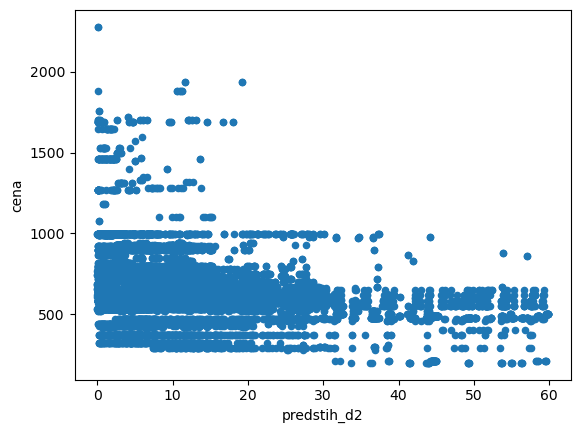

In [191]:
df[df['obdobi'].isin(spicka) & (df['predstih_d2'] <= 60)][['prodejce','predstih_d2','cena']].plot.scatter(x='predstih_d2', y='cena')

In [192]:
cd

0 d       [0.0, 369.0, 4.0]
1 d      [0.0, 425.0, 16.0]
2 d      [0.0, 535.0, 69.0]
3 d      [0.0, 569.0, 20.0]
4 d      [0.0, 604.0, 64.0]
                ...        
695 d    [59.0, 649.0, 1.0]
696 d    [60.0, 469.0, 2.0]
697 d    [60.0, 549.0, 2.0]
698 d    [60.0, 619.0, 3.0]
699 d    [60.0, 649.0, 1.0]
Name: České dráhy, Length: 700, dtype: object

Strašlivá ad hoc úprava funkce pro generování grafu:

In [194]:
def irozhlas_graf(
    carovy=[],
    sloupcovy=[],
    vodorovny=[],
    scatter=[],
    procenta=[],
    skryte=[],
    barvy=[],
    histogram=False,
    max_procenta=100,
    target="",
    titulek="",
    podtitulek="",
    naproti=[],
    osay=" ",
    osay2=" ",
    osaymin=None,
    osaymax=None,
    kredity=["zdroj dat a autorstvo", "url odkazu"],
    zaokrouhleni=1,
    prvni=True,
    skladany=False,
    naopak=False,
    vzhurunohama=False,
    skrytnuly=False,
):
    """
    Funkce vygeneruje HighCharts graf z pandas Series (jedné nebo více).

    iROZHLAS-friendly barvy:
    - "#b2e061" světle zelená
    - "#7eb0d5" světle modrá
    - "#fd7f6f" světle červená
    - "#bd7ebe" světle fialová
    - "#ffb55a" oranžová
    - "#ffee65" žlutá
    - "#beb9db" levandulová
    - "#fdcce5" skoro černá
    - "#8bd3c7" světle tyrkysová
    """

    import os
    import pandas as pd
    from highcharts_core.chart import Chart
    from highcharts_core.options.series.area import LineSeries
    from highcharts_core.options.series.bar import ColumnSeries
    from highcharts_core.options.series.bar import BarSeries
    from highcharts_core.options.series.histogram import HistogramSeries
    from highcharts_core.options.series.bubble import BubbleSeries
    from highcharts_core.options.plot_options.scatter import ScatterOptions
    from highcharts_core.options.plot_options.bubble import BubbleOptions
    from highcharts_core.options.series.scatter import ScatterSeries
    from highcharts_core.options.legend import Legend
    from highcharts_core.options.title import Title
    from highcharts_core.options.subtitle import Subtitle
    from highcharts_core.options.credits import Credits

    nastaveni = {}

    if prvni:
        zdrojaky = f"""<script src="https://code.highcharts.com/highcharts.js"></script><script src="https://code.highcharts.com/highcharts-more.js"></script>
<script src="https://code.highcharts.com/modules/exporting.js"></script>
<script src="https://code.highcharts.com/modules/export-data.js"></script>
<script src="https://code.highcharts.com/modules/accessibility.js"></script>
<link
  rel="stylesheet"
  href="https://fonts.googleapis.com/css?family=Noticia+Text"
/>
<link
  href="https://fonts.googleapis.com/css2?family=Asap"
  rel="stylesheet"
/>
<link
  href="https://fonts.googleapis.com/css2?family=Roboto"
  rel="stylesheet"
/>

<link
  rel="stylesheet"
  href="https://data.irozhlas.cz/hhighcharts-template/style.css"
/>
<link
  rel="stylesheet"
  href="https://data.irozhlas.cz/hhighcharts-template/highcharts-style.css"
/>
<style type="text/css">text{{font-family:"Asap"!important}}.paragraph{{font-family:"Noticia text"!important}}.href{{color:#666;fill:#666}}.highcharts-title{{font-family:"Noticia text"!important;font-weight:700!important;text-align:left!important;left:10px!important}}.highcharts-subtitle{{text-align:left!important;font-size:.95rem!important;left:10px!important;font-family:"Asap"!important}}.highcharts-data-labels text{{font-size:.85rem!important}}.highcharts-axis-labels text{{font-size:.85rem!important}}text.highcharts-plot-line-label{{font-size:.85rem!important;fill:#666}}text.highcharts-plot-band-label{{font-size:.85rem!important;fill:#666}}text.highcharts-credits{{font-size:.75rem!important}}.highcharts-tooltip span{{font-family:"Asap"!important}}.axis-label-on-tick{{fill:#aaa;color:#aaa}}.mock-empty-line{{fill:#fff;color:#fff}}</style>"""
    else:
        zdrojaky = ""

    pred = f"""{zdrojaky}
        <figure id="{target}">
        <div id="container"></div>
        </figure>
        <script>"""

    if len(carovy) > 0:
        categories = carovy[0].index.to_list()
    if len(sloupcovy) > 0:
        categories = sloupcovy[0].index.to_list()
    if len(vodorovny) > 0:
        categories = vodorovny[0].index.to_list()
    if len(scatter) > 0:
        categories = scatter[0].index.to_list()

    categories = [str(x) for x in categories]
    
    nastaveni["xAxis"] = {"categories": categories, "min": 0, "title": {"text": "předstih nákupu"}}
    nastaveni["yAxis"] = [
        {
            "title": {"text": osay},
            "reversed": vzhurunohama,
            "max": osaymax,
            "min": osaymin,
        }
    ]

    if skladany:
        if len(sloupcovy) > 0:
            nastaveni["plotOptions"] = {"column": {"stacking": "normal"}}
        if len(vodorovny) > 0:
            nastaveni["plotOptions"] = {"bar": {"stacking": "normal"}}
    if histogram:
        nastaveni["plotOptions"] = {
            "column": {
                "pointPadding": 0,
                "borderWidth": 0,
                "groupPadding": 0,
                "shadow": False,
            }
        }

    if len(procenta) > 0:
        osa_procent = {
            "title": {"text": osay2},
            "max": max_procenta,
            "min": 0,
            "labels": {"format": "{value} %"},
        }

        if len(procenta) != len(carovy) + len(sloupcovy):
            osa_procent["opposite"] = True
            druha_osa = 1
            nastaveni["yAxis"].append(osa_procent)
            nastaveni["alignTicks"] = False
        if len(procenta) == len(carovy) + len(sloupcovy):
            nastaveni["yAxis"] = [osa_procent]
            druha_osa = 0

    if len(naproti) > 0:
        druha_osa = 1
        druha_osa_y = {
            "title": {"text": osay2},
            "opposite": True,
            "max": naproti[0].max(),
            "min": 0,
        }
        nastaveni["yAxis"].append(druha_osa_y)

    my_chart = Chart(container=target, options=nastaveni)

    procenta = [p.name for p in procenta]
    naproti = [n.name for n in naproti]
    skryte = [s.name for s in skryte]

    def vykresleni(serie, typ):
        for s in serie:
            popisek = s.name

            if s.name in skryte:
                viditelnost = False
            else:
                viditelnost = True

            ktera_osa = 0
            if s.name in naproti:
                ktera_osa = druha_osa

            if s.name in procenta:
                s = [round(x * 100, zaokrouhleni) for x in s.fillna(0).to_list()]
                my_chart.add_series(
                    typ(
                        data=s,
                        visible=viditelnost,
                        name=popisek,
                        y_axis=druha_osa,
                        tooltip={"valueSuffix": " %"},
                    )
                )

            else:
                my_chart.add_series(
                    typ(
                        data=s.fillna(0).to_list(),
                        visible=viditelnost,
                        name=popisek,
                        y_axis=ktera_osa,
                        tooltip = {
				'pointFormat': '{point.x}denní předstih: {point.y} Kč, nabídnuto {point.z}×'
			}
                    )
                )

    if len(sloupcovy) > 0:
        vykresleni(sloupcovy, ColumnSeries)
    if len(carovy) > 0:
        vykresleni(carovy, LineSeries)
    if len(vodorovny) > 0:
        vykresleni(vodorovny, BarSeries)
    if len(scatter) > 0:
        vykresleni(scatter, BubbleSeries)

    if len(barvy) > 0:
        my_chart.options.colors = barvy
    else:
        my_chart.options.colors = colors = [
            "#b2e061",  ## světle zelená (light green)
            "#7eb0d5",  ## světle modrá (light blue)
            "#fd7f6f",  ## světle červená (light red)
            "#bd7ebe",  ## světle fialová (light purple)
            "#ffb55a",  ## oranžová (orange)
            "#ffee65",  ## žlutá (yellow)
            "#beb9db",  ## levandulová (lavender)
            "#fdcce5",  ## skoro černá
            "#8bd3c7",  ## světle tyrkysová (light turquoise)
        ]

    if naopak:
        my_chart.options.legend = Legend(reversed=True)

    my_chart.options.title = Title(text=titulek, align="left", margin=30)

    if len(podtitulek) > 0:
        my_chart.options.subtitle = Subtitle(text=podtitulek, align="left")

    my_chart.options.credits = Credits(text=kredity[0], enabled=True, href=kredity[1])

    as_js_literal = my_chart.to_js_literal()

    if skrytnuly == True:
        as_js_literal = as_js_literal.replace("y: 0.0", "y: null")

    code = f"<html><head><title>{titulek}</title></head><body>{pred}{as_js_literal}</script></body></html>"

    if not os.path.exists("grafy"):
        os.mkdir("grafy")

    with open(os.path.join("grafy", target + ".html"), "w+") as f:
        f.write(code)

    with open(os.path.join("grafy", target + ".txt"), "w+") as f:
        f.write(f"{pred}{as_js_literal}</script>")

        print("Graf uložen.")

In [195]:
spicka

['7-3', '5-3', '5-2', '5-1']

In [196]:
irozhlas_graf(scatter=[cd, rj, le], barvy=["#526d77","#fabb00","#e68014"], target='prgova_bubble', titulek='Jízdné Praha &#8596; Ostrava na začátku a konci víkendu', osaymin=0, podtitulek='Nabízené ceny jízdenek na páteční (8.00-16.00) a nedělní (12.00-20.00) špičku', kredity=['Zdroj dat: e-shopy dopravců od 7. 11. do 26. 11. 2024. Vizualizace: iROZHLAS.cz','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika'])

Graf uložen.
